# Load the saved models

In [1]:
import joblib

# Load Random Forest model
rf_model = joblib.load('saved_models/random_forest_fraud_model.pkl')

# Load Logistic Regression model
lr_model = joblib.load('saved_models/logistic_regression_fraud_model.pkl')

# Load Neural Network Model (if applicable)
from tensorflow.keras.models import load_model
cnn_model_fraud = load_model('saved_models/RNN_fraud_model.h5')

# Load LSTM model
lstm_model_fraud = load_model('saved_models/LSTM_fraud_model.h5')

# Load decision tree model
tree_model = joblib.load('saved_models/decision_tree_fraud_model.pkl')

# Load model
gradient_model = joblib.load('saved_models/gradient_boosting_fraud_model.pkl')

# Load model
mlp_model = joblib.load('saved_models/MLP_fraud_model.pkl')

# Load the test data

In [2]:
import pandas as pd

# Load test data from CSV if necessary
X_fraud_test = pd.read_csv('../data/splittedData/X_fraud_test.csv')
y_fraud_test = pd.read_csv('../data/splittedData/y_fraud_test.csv')

X_fraud_test.head()
# y_fraud_test.head()

,user_id,purchase_value,age,ip_address,lower_bound_ip_address,upper_bound_ip_address,transaction_velocity,purchase_hour,purchase_day_of_week,source_Direct,...,country_Zimbabwe,device_id_target_encoded,signup_year,signup_month,signup_day,signup_hour,purchase_year,purchase_month,purchase_day,time_diff_hours
0,247547,47,30,1.677886e+07,16778240.0,16779263.0,3632215.0,3,6,False,...,False,0.082634,2015,6,28,3,2015,8,9,1008.948611
1,220737,15,34,1.684205e+07,16809984.0,16842751.0,1231637.0,20,2,False,...,False,0.082634,2015,1,28,14,2015,2,11,342.121389
2,390400,44,29,1.684366e+07,16843264.0,16843775.0,1997534.0,23,5,False,...,False,0.081518,2015,3,19,20,2015,4,11,554.870556
3,69592,55,30,1.693873e+07,16924672.0,16941055.0,7640897.0,16,5,True,...,False,0.082634,2015,2,24,6,2015,5,23,2122.471389
4,174987,51,37,1.697198e+07,16941056.0,16973823.0,10249579.0,4,1,False,...,False,0.082634,2015,7,7,12,2015,11,3,2847.105278


# SHAP (SHapley Additive exPlanations)

###  Random Forest Model

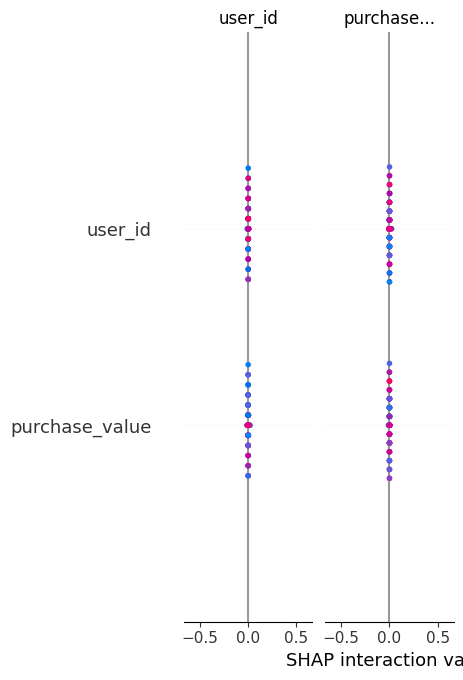

In [16]:
import shap

# Sample a smaller subset for SHAP analysis
sample_size = 100  # Adjust based on your needs
X_sample = X_fraud_test.sample(n=sample_size, random_state=42)

# Create a SHAP explainer for the Random Forest model
rf_explainer = shap.TreeExplainer(rf_model)
rf_shap_values = rf_explainer.shap_values(X_sample)

# Plot the SHAP values for the sampled instances
shap.initjs()
shap.summary_plot(rf_shap_values, X_sample, feature_names=X_sample.columns)


### Logistic Regression Model

In [ ]:
import shap

# Sample a smaller subset for SHAP analysis
sample_size = 100  # Adjust based on your needs
X_sample = X_fraud_test.sample(n=sample_size, random_state=42)

# Create a SHAP explainer for the Logistic Regression model
lr_explainer = shap.LinearExplainer(lr_model, X_sample)
lr_shap_values = lr_explainer.shap_values(X_sample)

# Plot the SHAP values for the sampled instances
shap.initjs()
shap.summary_plot(lr_shap_values, X_sample, feature_names=X_sample.columns)


In [37]:
print(X_sample.dtypes)


user_id                   float32
purchase_value            float32
age                       float32
ip_address                float32
lower_bound_ip_address    float32
                           ...   
signup_hour               float32
purchase_year             float32
purchase_month            float32
purchase_day              float32
time_diff_hours           float32
Length: 205, dtype: object


### Decision tree

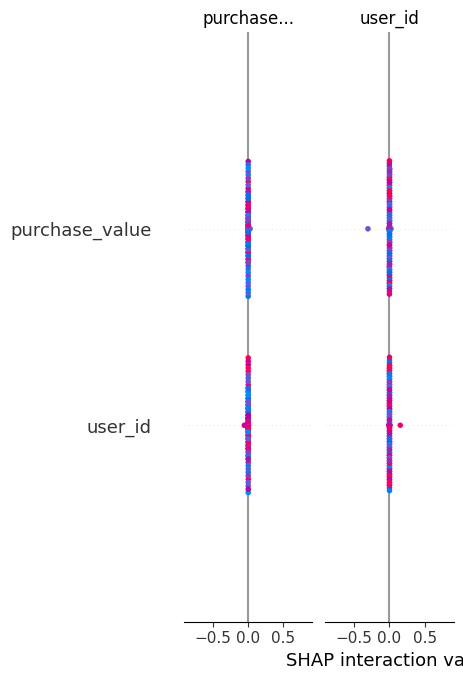

In [14]:
import shap

# Sample a smaller subset for SHAP analysis
sample_size = 100  # Adjust based on your needs
X_sample = X_fraud_test.sample(n=sample_size, random_state=42)

# Create a SHAP explainer for the Decision Tree model
tree_explainer = shap.TreeExplainer(tree_model)
tree_shap_values = tree_explainer.shap_values(X_sample)

# Plot the SHAP values for the sampled instances
shap.initjs()
shap.summary_plot(tree_shap_values, X_sample, feature_names=X_sample.columns)


 ### Gradient Boosting Model

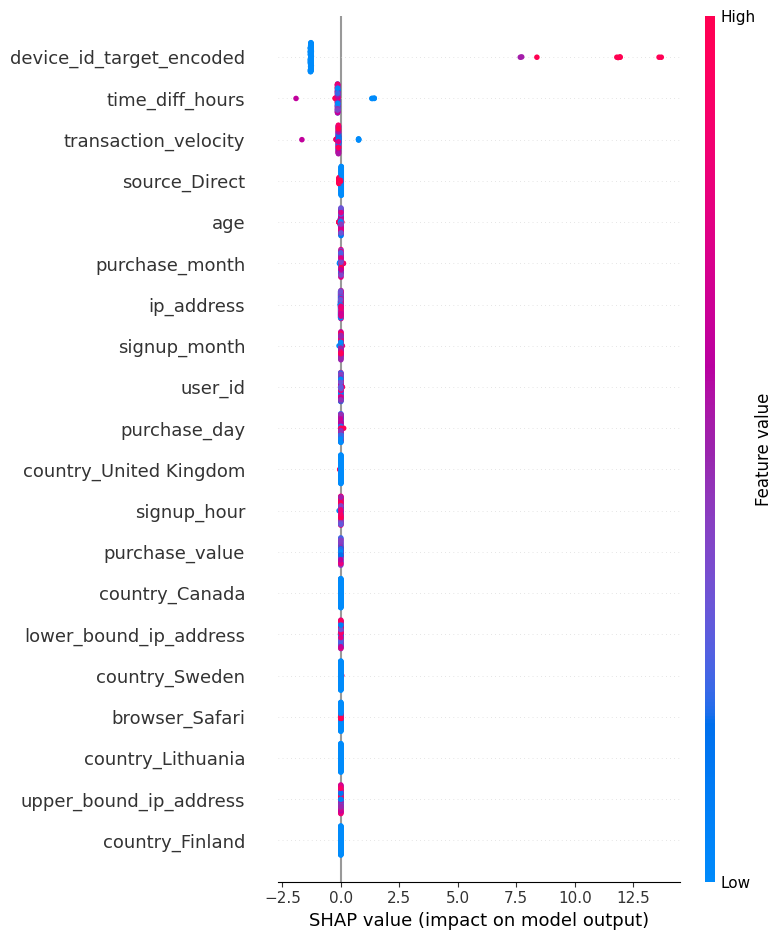

In [13]:
import shap

# Sample a smaller subset for SHAP analysis
sample_size = 100  # Adjust based on your needs
X_sample = X_fraud_test.sample(n=sample_size, random_state=42)

# Create a SHAP explainer for the Gradient Boosting model
gradient_explainer = shap.TreeExplainer(gradient_model)
gradient_shap_values = gradient_explainer.shap_values(X_sample)

# Plot the SHAP values for the sampled instances
shap.initjs()
shap.summary_plot(gradient_shap_values, X_sample, feature_names=X_sample.columns)


### Multi-layer Perceptron (MLP) Model

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:23<00:00,  4.17it/s]


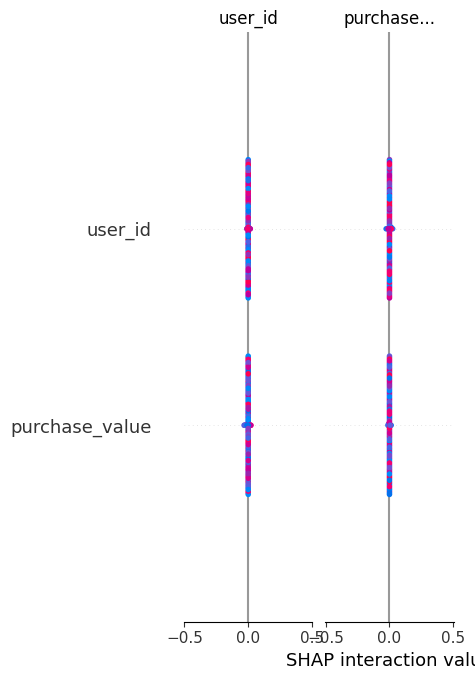

In [22]:
import shap
import numpy as np

# Sample a smaller subset for SHAP analysis
sample_size = 100  # Adjust based on your needs
X_sample = X_fraud_test.sample(n=sample_size, random_state=42)

# Convert the data to float32 for compatibility (if needed)
X_sample_float = X_sample.astype('float32')

# Reshape the data as needed, depending on how the MLP model expects the input shape
X_sample_reshaped = np.array(X_sample_float)

# Create a SHAP explainer using KernelExplainer for the MLP model
mlp_explainer = shap.KernelExplainer(mlp_model.predict_proba, X_sample_reshaped[:10])  # Background sample

# Calculate SHAP values
mlp_shap_values = mlp_explainer.shap_values(X_sample_reshaped)

# Plot the SHAP values for the sampled instances
shap.initjs()
shap.summary_plot(mlp_shap_values, X_sample_reshaped, feature_names=X_sample.columns)


###  LSTM Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


  1%|          | 1/100 [00:01<02:48,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 899us/step


  2%|▏         | 2/100 [00:02<02:14,  1.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 957us/step


  3%|▎         | 3/100 [00:03<01:59,  1.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step


  4%|▍         | 4/100 [00:05<01:53,  1.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 852us/step


  5%|▌         | 5/100 [00:06<01:52,  1.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 871us/step


  6%|▌         | 6/100 [00:07<01:47,  1.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 836us/step


  7%|▋         | 7/100 [00:08<01:42,  1.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 818us/step


  8%|▊         | 8/100 [00:09<01:39,  1.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step


  9%|▉         | 9/100 [00:10<01:36,  1.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step


 10%|█         | 10/100 [00:11<01:35,  1.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step


 11%|█         | 11/100 [00:12<01:38,  1.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step


 12%|█▏        | 12/100 [00:13<01:36,  1.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 954us/step


 13%|█▎        | 13/100 [00:14<01:37,  1.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 788us/step


 14%|█▍        | 14/100 [00:15<01:32,  1.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step


 15%|█▌        | 15/100 [00:17<01:34,  1.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 885us/step


 16%|█▌        | 16/100 [00:18<01:32,  1.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 17%|█▋        | 17/100 [00:19<01:35,  1.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step


 18%|█▊        | 18/100 [00:20<01:35,  1.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 19%|█▉        | 19/100 [00:21<01:34,  1.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step


 20%|██        | 20/100 [00:22<01:31,  1.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 21%|██        | 21/100 [00:24<01:32,  1.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 22%|██▏       | 22/100 [00:25<01:33,  1.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 23%|██▎       | 23/100 [00:26<01:32,  1.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step


 24%|██▍       | 24/100 [00:27<01:29,  1.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 25%|██▌       | 25/100 [00:29<01:33,  1.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 26%|██▌       | 26/100 [00:30<01:34,  1.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 27%|██▋       | 27/100 [00:31<01:32,  1.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 28%|██▊       | 28/100 [00:32<01:31,  1.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 29%|██▉       | 29/100 [00:34<01:28,  1.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
659/659 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step


 30%|███       | 30/100 [00:35<01:25,  1.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 31%|███       | 31/100 [00:36<01:27,  1.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 32%|███▏      | 32/100 [00:37<01:25,  1.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
659/659 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 33%|███▎      | 33/100 [00:39<01:25,  1.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 34%|███▍      | 34/100 [00:40<01:27,  1.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 35%|███▌      | 35/100 [00:42<01:27,  1.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 36%|███▌      | 36/100 [00:43<01:26,  1.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 37%|███▋      | 37/100 [00:44<01:25,  1.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step


 38%|███▊      | 38/100 [00:45<01:19,  1.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 911us/step


 39%|███▉      | 39/100 [00:46<01:15,  1.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
659/659 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step


 40%|████      | 40/100 [00:48<01:12,  1.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 41%|████      | 41/100 [00:49<01:10,  1.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step


 42%|████▏     | 42/100 [00:50<01:09,  1.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 43%|████▎     | 43/100 [00:51<01:09,  1.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 44%|████▍     | 44/100 [00:53<01:10,  1.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 45%|████▌     | 45/100 [00:54<01:09,  1.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 46%|████▌     | 46/100 [00:55<01:09,  1.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 47%|████▋     | 47/100 [00:56<01:06,  1.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 48%|████▊     | 48/100 [00:58<01:10,  1.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 49%|████▉     | 49/100 [00:59<01:09,  1.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step


 50%|█████     | 50/100 [01:01<01:04,  1.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


 51%|█████     | 51/100 [01:02<01:02,  1.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 52%|█████▏    | 52/100 [01:03<01:00,  1.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 53%|█████▎    | 53/100 [01:04<00:58,  1.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


 54%|█████▍    | 54/100 [01:05<00:55,  1.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
659/659 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 55%|█████▌    | 55/100 [01:07<00:57,  1.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 56%|█████▌    | 56/100 [01:08<00:55,  1.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 57%|█████▋    | 57/100 [01:09<00:54,  1.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step


 58%|█████▊    | 58/100 [01:10<00:51,  1.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step


 59%|█████▉    | 59/100 [01:11<00:48,  1.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step


 60%|██████    | 60/100 [01:13<00:46,  1.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 61%|██████    | 61/100 [01:14<00:46,  1.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step


 62%|██████▏   | 62/100 [01:15<00:45,  1.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 977us/step


 63%|██████▎   | 63/100 [01:16<00:43,  1.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 64%|██████▍   | 64/100 [01:17<00:44,  1.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 65%|██████▌   | 65/100 [01:19<00:42,  1.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 869us/step


 66%|██████▌   | 66/100 [01:20<00:41,  1.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
659/659 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 67%|██████▋   | 67/100 [01:21<00:41,  1.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 68%|██████▊   | 68/100 [01:22<00:40,  1.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 69%|██████▉   | 69/100 [01:24<00:38,  1.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 70%|███████   | 70/100 [01:25<00:37,  1.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step


 71%|███████   | 71/100 [01:26<00:35,  1.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 72%|███████▏  | 72/100 [01:27<00:33,  1.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 978us/step


 73%|███████▎  | 73/100 [01:28<00:32,  1.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 74%|███████▍  | 74/100 [01:30<00:31,  1.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step


 75%|███████▌  | 75/100 [01:31<00:30,  1.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 76%|███████▌  | 76/100 [01:32<00:29,  1.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 77%|███████▋  | 77/100 [01:33<00:27,  1.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 78%|███████▊  | 78/100 [01:35<00:26,  1.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
659/659 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 79%|███████▉  | 79/100 [01:36<00:25,  1.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 80%|████████  | 80/100 [01:37<00:24,  1.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step


 81%|████████  | 81/100 [01:38<00:22,  1.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 82%|████████▏ | 82/100 [01:39<00:21,  1.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 83%|████████▎ | 83/100 [01:41<00:20,  1.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step


 84%|████████▍ | 84/100 [01:42<00:18,  1.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 85%|████████▌ | 85/100 [01:43<00:17,  1.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 86%|████████▌ | 86/100 [01:44<00:16,  1.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step


 87%|████████▋ | 87/100 [01:45<00:15,  1.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 88%|████████▊ | 88/100 [01:46<00:14,  1.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 89%|████████▉ | 89/100 [01:48<00:13,  1.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 884us/step


 90%|█████████ | 90/100 [01:49<00:11,  1.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 91%|█████████ | 91/100 [01:50<00:10,  1.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 92%|█████████▏| 92/100 [01:51<00:09,  1.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 964us/step


 93%|█████████▎| 93/100 [01:53<00:08,  1.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 94%|█████████▍| 94/100 [01:54<00:07,  1.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 95%|█████████▌| 95/100 [01:55<00:06,  1.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 942us/step


 96%|█████████▌| 96/100 [01:56<00:04,  1.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 978us/step


 97%|█████████▋| 97/100 [01:57<00:03,  1.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 98%|█████████▊| 98/100 [01:58<00:02,  1.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 99%|█████████▉| 99/100 [02:00<00:01,  1.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


100%|██████████| 100/100 [02:01<00:00,  1.22s/it]


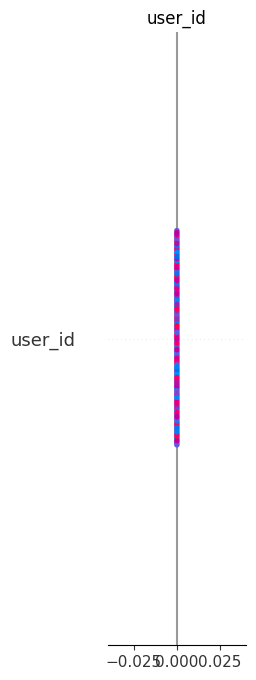

In [20]:
import shap
import numpy as np

# Sample a smaller subset for SHAP analysis
sample_size = 100
X_sample = X_fraud_test.sample(n=sample_size, random_state=42)

# Convert to float32 for TensorFlow compatibility
X_sample_float = X_sample.astype('float32')

# Reshape the data to 3D shape (samples, time steps, features) for the LSTM model
X_sample_reshaped = np.reshape(X_sample_float.to_numpy(), (X_sample_float.shape[0], 1, X_sample_float.shape[1]))

# Define a prediction function that reshapes 2D input back into 3D before passing to the LSTM model
def lstm_predict_reshaped(X):
    X_reshaped = np.reshape(X, (X.shape[0], 1, X.shape[1]))  # Reshape to 3D (samples, time steps, features)
    return lstm_model_fraud.predict(X_reshaped)

# Flatten the 3D input to 2D to pass to SHAP's KernelExplainer
X_sample_flat = X_sample_reshaped.reshape(X_sample_reshaped.shape[0], -1)

# Create a KernelExplainer for the LSTM model
lstm_explainer = shap.KernelExplainer(lstm_predict_reshaped, X_sample_flat[:10])  # Smaller background sample
lstm_shap_values = lstm_explainer.shap_values(X_sample_flat)

# Plot the SHAP values
shap.initjs()
shap.summary_plot(lstm_shap_values, X_sample_flat, feature_names=X_sample.columns)


### Neural Network (RNN) Model

In [40]:
# Sample a smaller subset for SHAP analysis
sample_size = 100  # Adjust based on your needs
X_sample = X_fraud_test[expected_feature_columns].sample(n=sample_size, random_state=42)

# Convert to float32 to ensure compatibility with TensorFlow
X_sample = X_sample.astype(np.float32)

# Define time_steps and num_features based on your CNN's input layer
time_steps = 2  # Set this according to your input shape
num_features = len(expected_feature_columns)  # Should match the number of selected features

# Check the shape of X_sample before reshaping
print("Original sample shape:", X_sample.shape)

# Calculate the number of complete batches
num_batches = X_sample.shape[0] // time_steps
print(f"Number of complete batches: {num_batches}")

# Adjust sample size to fit complete batches
adjusted_sample_size = num_batches * time_steps
print(f"Adjusted sample size for reshaping: {adjusted_sample_size}")

# Slice the data to the adjusted sample size if necessary
X_sample = X_sample.iloc[:adjusted_sample_size]

# Debugging: Check the new shape of the sliced input
print("Sliced sample shape:", X_sample.shape)

# Check if the total number of elements can be reshaped correctly
total_elements = X_sample.size
print(f"Total elements in X_sample: {total_elements}")

# Reshape the input to match the expected input shape of your CNN model
try:
    X_sample_reshaped = X_sample.values.reshape((-1, time_steps, num_features))  # Use -1 to infer batch size
except ValueError as e:
    raise ValueError(f"Reshape failed: {e}. Check if your data has the correct dimensions for the reshape.")

# Debugging: Check the shape of the reshaped input
print("Reshaped input shape:", X_sample_reshaped.shape)

# Create a SHAP explainer for the CNN model using DeepExplainer
cnn_explainer = shap.DeepExplainer(cnn_model_fraud, X_sample_reshaped)

# Calculate SHAP values
cnn_shap_values = cnn_explainer.shap_values(X_sample_reshaped)

# Plot the SHAP values for the sampled instances
shap.initjs()
shap.summary_plot(cnn_shap_values, X_sample_reshaped, feature_names=expected_feature_columns)


KeyError: "None of [Index(['feature1', 'feature2', 'feature3', Ellipsis, 'feature28'], dtype='object')] are in the [columns]"

: 